# Phugoid

    http://en.wikipedia.org/wiki/Phugoid

    This interact shows equations of phugid dynamics. It is 2 dimensional ODE system, which exhibis limit cycle, fixed point and bistability.
    
<img src="data/plane.png">
     
 * $R$ is drag force (relative to the lift i.e. 0.1 means moderate plane)
 * $F$ is thrust force
 * $\theta$ is an angle of flight relative to horizont
 * $v$ is speed of the aircraft
\begin{eqnarray*}
    \frac{dv}{dt} &=& -\sin \theta -R v^2 +F \\
   \frac{d \theta}{d t } &=& \frac{v^2- \cos \theta}{v}
\end{eqnarray*}    
Here, 1) $g$ is set to be one,  2) $F=0$,  3) The *drag* and *lift* forces are proportional to $v^2$ by experiments.


There are few interesting cases:
   $R=0, F=0$: ideal glider. There are two states depending on initial velocity: oscilations around $\theta=0$, and loops. Loops can be seen at bigger initial speed, the trajectory goes over $\pi$ (on plot we put it back $-\pi$
   Paper plane: set $R=0.1$ and $F=0$. Note the dependence of flight mode on initial speed. Plane can do a loop or oscilate, but there is always one fixed point.
   Motorized flight. There is a fixed point=limit cycle bistablity: e.g. $R=0.12$ and $F=0.3$ depending on initial velocity the plane reaches fixed point or limit cycle.



##Legend:

Red line is a trajectory $v(\theta)$.
    Blue lines are nullclines of vector field of RHS of ODE.
    Yellow point is a singular point of vector field.
    Green point is an initial condition. We start always at $\theta=0$ but with various speeds.



In [ ]:
import numpy as np
from math import sin,cos,pi
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
#from JSAnimation import IPython_display
#from ipywidgets import StaticInteract, RangeWidget,RadioWidget
#from ipywidgets import r
#from IPython.html.widgets import *
from IPython.display import clear_output,HTML
import time,random,sys

%matplotlib inline

In [ ]:
F=0
R=0.2
h0=2

theta0=0
v0=5.

t = np.linspace(0, 20, 2000)

In [ ]:
def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    (v,theta,x,y)
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = -sin(x2)-R*x1*x1+F
    dx2 = (x1*x1-cos(x2))/x1

    dx3 = x1*cos(x2)
    dx4 = x1*sin(x2)

    return [dx1, dx2, dx3, dx4]

In [ ]:
theta0Rad=theta0/180.*pi
x0 = [v0,theta0Rad,0,h0]

In [ ]:
x = odeint(dx, x0, t)

In [ ]:
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)

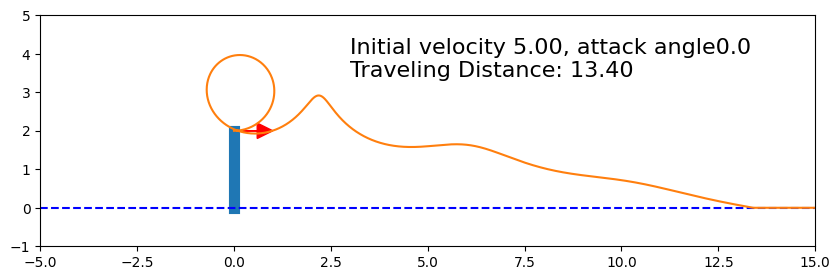

In [ ]:
#twfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/bkai00mp.ttf')
#s=u'\u7D19\u98DB\u6A5F'
s='Paper Plain'
fig, axes = plt.subplots(figsize=(10,3))

#plt.title(s,fontproperties=twfont,size=24)
plt.text(3,4,'Initial velocity %2.2f, attack angle%2.1f' %(v0,theta0Rad), size=16)
plt.text(3,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16)
plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.arrow(0,h0,np.cos(theta0Rad)*0.6,np.sin(theta0Rad)*0.6,color='red',head_width=0.4, head_length=0.4 )
plt.plot(x[:,2],y);

In [ ]:
def phogoid(t,h0,theta0,v0):
    theta0=theta0/180.*pi

    x0 = [v0,theta0,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)

    fig, axes = plt.subplots(figsize=(10,3))
    plt.title('Paper Plane', size=24)
    plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
    plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    plt.plot([0,0],[0,h0],lw=8)
    plt.plot([-5,15],[0,0],'--b')
    plt.arrow(0,h0,np.cos(theta0)*0.6,np.sin(theta0)*0.6,color='red',head_width=0.4, head_length=0.4)
    plt.grid()
    plt.plot(x[:,2],y)

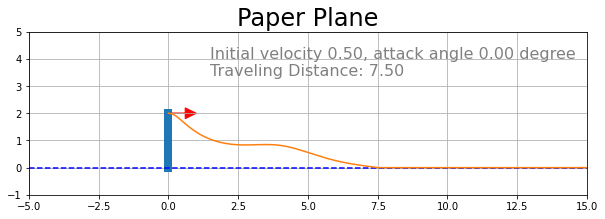

In [ ]:
phogoid(t,h0,0,0.5)

Here, generate the animation directly by **matplotlib.animation**, reference, `Documents/2016/Math/5 twoDimensionalWaves/2D waves by Circles.ipynb`, another method generated by moviepy

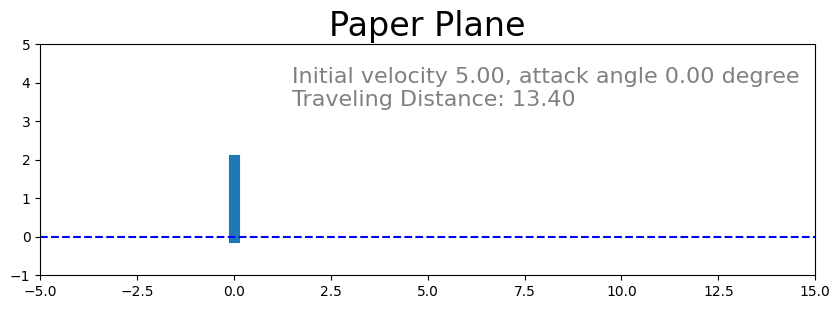

In [ ]:
ratio=20
anim = plt.figure(figsize=(10,3))
ax = anim.add_subplot(111)
ax.set_title("Paper Plane",fontsize=14)

plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.title('Paper Plane', size=24)
plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
#def init():
#    return  ax.plot(x[0,2],y[0],'--r'),\
#            plt.arrow(0,h0,np.cos(theta0)*0.6,np.sin(theta0)*0.6,color='red',head_width=0.4, head_length=0.4) \
#
#|
def animate(i):
    if (i>0):
        dx=(x[i*ratio,2]-x[(i-1)*ratio,2])#/np.abs(x[i*ratio,2]-x[(i-1)*ratio,2])*0.4
        dy=(y[i*ratio]-y[(i-1)*ratio])#/np.abs(y[i*ratio]-y[(i-1)*ratio])*0.4
    else:
        dx=np.cos(theta0)*0.6;
        dy=np.sin(theta0)*0.6;
    ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r')
    #ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)
    #return ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r'), \
    #    ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)


In [ ]:
anim1=animation.FuncAnimation(anim, animate, init_func=init,frames=int(TavelTime/ratio))

In [ ]:
HTML(anim1.to_html5_video())

Option for initial velocity and attack angle implement by `ipywidegets`, which usages are changed very differently among different versions.

In [ ]:
x0 = [v0,theta0,0,h0];
t = np.linspace(0, 20, 2000)
x = odeint(dx, x0, t);
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)
ratio=20

In [ ]:
def phogoid2(theta0,v0):
    angle=theta0/180.*pi

    x0 = [v0,angle,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)

    figM = plt.figure(figsize=(10,3))
    ax=figM.add_subplot(111)
    plt.title('Paper Plane')
    plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.1f degree' %(v0,theta0), size=16, color='grey')
    plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    ax.plot([0,0],[0,h0],lw=8)
    ax.plot([-5,15],[0,0],'--b')
    ax.arrow(0,h0,np.cos(angle),np.sin(angle),color='red',head_width=0.4, head_length=0.4)

    plt.grid()
    ax.plot(x[:,2],y)
    # to prevant the keep the previous ones left
    plt.show()
    #return figM

In [ ]:
interactive_plot=widget.interactive(phogoid2,theta0=widget.IntSlider(min=0, max=90, step=5, description='AttackAngle',value=0),\
         v0=widget.FloatSlider(min=0.5, max=5, value=0.5,description='Initial Velocity',), continuous_update=False)
#interactive_plot.children[:-1]

interactive(children=(IntSlider(value=0, description='AttackAngle', max=90, step=5), FloatSlider(value=0.5, de…

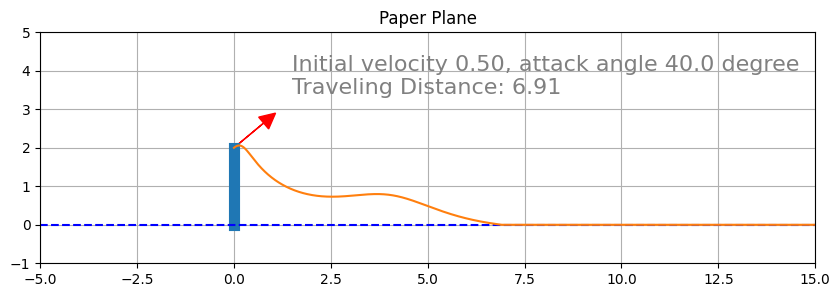

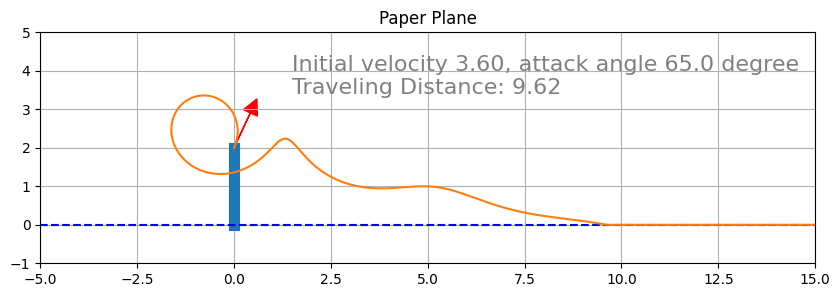

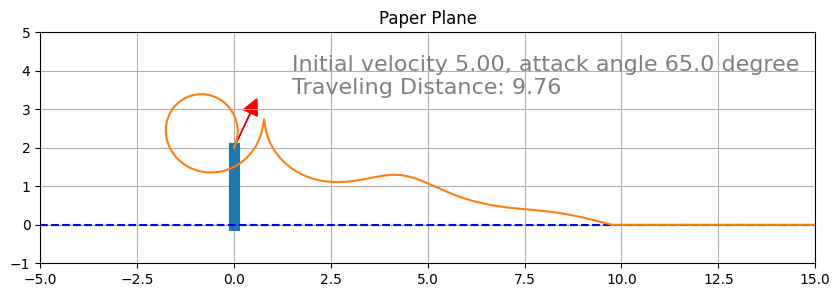

In [ ]:
interactive_plot

## Traffic Jam (ASEP Model)

**Reference**

1. 西城活裕 （にしなり かつひろ), 『渋滞学』新潮選書, 2006
2. B. Derrida, S.A. Janowsky, J.L. Lebowitz, E.R. Speer, Exact solution of the totally asymmetric simple exclusion process: shock profiles J. Stat. Phys. 73, 813-842 (1993)
3. B. Derrida, M.R. Evans, V. Hakim, V. Pasquier, Exact solution of a 1d asymmetric exclusion model using a matrix formulation J. Phys. A26, 1493-1517 (1993)

In [ ]:
ACTIVE = True
PASSIVE = False

class Node:
    def __init__(self, state):
        self._state = state

    def flip(self):
        self._state = not self._state
        return self._state

    def state(self):
        return self._state

    def __str__(self):
        return self._state and "D" or "-"



class AsepField(list):
    def __init__(self, length):
        list.__init__(self, [Node(PASSIVE) for _ in range(length)])

    def update(self):
        def pred(idx):
            return self[idx].state() and \
                   not self[(idx+1)%len(self)].state()
        predlst = [pred(x) for x in range(len(self))]
        for i in range(len(self)):
            if predlst[i]:
               self[i].flip()
               self[(i+1)%len(self)].flip()

    def __str__(self):
        strs = list(map(str, self))
        s = "<AsepField at %d [%s]>" % (id(self), ", ".join(strs))
        return s

def aesp(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()

    # mainloop
    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",
        print("".join(map(str,asep)))
        #time.sleep(0.5)
        asep.update()

In [ ]:

def aesp2(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()


    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",$
        #time.sleep(0.2)
        clear_output(wait=True)
        print("".join(map(str,asep)))

        time.sleep(0.3)
        asep.update()
        sys.stdout.flush()

In [ ]:
aesp2(80,45,100)

-D-D-D-DD-DDDD-DD-D-D-D-D-D-D-D-D-D-DDDDDD-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D


In [ ]:
def aesp3(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()

    red_d_index = None
    frame_to_display = None

    for frame in range(arg[2]):
        clear_output(wait=True)

        # Create a list of characters
        display = list(map(str, asep))

        # Find the first 'D' and color it red if not already set
        if red_d_index is None and 'D' in display:
            red_d_index = display.index('D')

        # Move the red 'D' if possible
        if red_d_index is not None:
            # Check if the current red_d_index is still a 'D'
            if display[red_d_index] != 'D':
                # If not, find the next 'D'
                try:
                    red_d_index = display.index('D', red_d_index)
                except ValueError:
                    # If no 'D' found from current position, search from the beginning
                    try:
                        red_d_index = display.index('D')
                    except ValueError:
                        # If no 'D' at all, reset red_d_index
                        red_d_index = None

            if red_d_index is not None:
                # Check if there's a blank space before the red D
                if red_d_index > 0 and display[red_d_index - 1] == '.':
                    frame_to_display = frame

                # Move forward if there's space
                if red_d_index < len(display) - 1 and display[red_d_index + 1] == '.':
                    red_d_index += 1
                    if frame_to_display == frame - 1:
                        print(f"Red D moved at frame {frame}")
                        frame_to_display = None

                # Color the current D red
                display[red_d_index] = '\033[91mD\033[0m'  # Red color

        print(f"Frame {frame}: " + "".join(display))

        if frame_to_display == frame:
            print(f"Red D has a blank space before it at frame {frame}")

        time.sleep(0.3)
        asep.update()
        sys.stdout.flush()

In [ ]:
aesp3(80,30,100)

Frame 99: -D-D-D-D-D-D--D-D-D-D-D-D------D--D-----D-D-D-D-D--D-D-D-D-D---------D-D-D-D-D-D


In [ ]:
aesp(80,40,50)

DDD---DD--DDD-----D-D-D---DDDD--DD------D-DDD-DDDD-D---DD--D-DD----DDDDDD---DD-D
DD-D--D-D-DD-D-----D-D-D--DDD-D-D-D------DDD-DDDD-D-D--D-D--DD-D---DDDDD-D--D-DD
D-D-D--D-DD-D-D-----D-D-D-DD-D-D-D-D-----DD-DDDD-D-D-D--D-D-D-D-D--DDDD-D-D--DDD
-D-D-D--DD-D-D-D-----D-D-DD-D-D-D-D-D----D-DDDD-D-D-D-D--D-D-D-D-D-DDD-D-D-D-DDD
D-D-D-D-D-D-D-D-D-----D-DD-D-D-D-D-D-D----DDDD-D-D-D-D-D--D-D-D-D-DDD-D-D-D-DDD-
-D-D-D-D-D-D-D-D-D-----DD-D-D-D-D-D-D-D---DDD-D-D-D-D-D-D--D-D-D-DDD-D-D-D-DDD-D
D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D--DD-D-D-D-D-D-D-D--D-D-DDD-D-D-D-DDD-D-
-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D--D-DDD-D-D-D-DDD-D-D
D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D--DDD-D-D-D-DDD-D-D-
-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D
D-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D-
-D-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D-D
D-D-D-D-D-D-D-D-D-D-D-D-D---

# Magic

What you don't have any idea is called *MAGIC*; otherwise, it is called *TRIVIAL*.

Suppose that 100 digits, each with integer value between 0 and 9, are created by random. Take any  oans ne from the first digits and follows the following rule to do:

       Move the position to the next one according to the value of chosen digit, e.g. "3" means moves 3 steps, and "0" moves 10
       steps. Continue the process till can not move again. And I can guess the final figid what you get.

In [ ]:
x=floor(10*np.random.random(100))
print(x)

[ 8.  8.  3.  1.  0.  3.  5.  4.  3.  7.  3.  7.  2.  4.  2.  7.  7.  0.
  1.  5.  9.  1.  7.  1.  6.  0.  3.  2.  1.  6.  9.  5.  3.  2.  0.  5.
  0.  6.  5.  6.  6.  2.  7.  5.  8.  3.  2.  6.  5.  8.  2.  8.  8.  0.
  9.  7.  3.  3.  9.  9.  9.  0.  6.  7.  6.  1.  7.  1.  0.  0.  0.  6.
  5.  9.  5.  5.  3.  7.  7.  7.  3.  4.  8.  8.  5.  1.  5.  9.  4.  2.
  1.  8.  8.  7.  9.  2.  8.  8.  4.  5.]


In [ ]:
def magic(first,x):
    i=first
    while i<size(x):
        print(i,int(x[i]))
        if x[i]==0.:
           i+=10;
        else: i+=int(x[i]);

In [ ]:
magic(9,x)

(9, 7)
(16, 7)
(23, 1)
(24, 6)
(30, 9)
(39, 6)
(45, 3)
(48, 5)
(53, 0)
(63, 7)
(70, 0)
(80, 3)
(83, 8)
(91, 8)
(99, 5)


In [ ]:
magic(4,x)

(4, 0)
(14, 2)
(16, 7)
(23, 1)
(24, 6)
(30, 9)
(39, 6)
(45, 3)
(48, 5)
(53, 0)
(63, 7)
(70, 0)
(80, 3)
(83, 8)
(91, 8)
(99, 5)
